# 2. 탐색 알고리즘 DFS/BFS

## DFS
- **DFS**(Depth-First Search) : 깊이 우선 탐색. 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘
    - 그래프(Graph)의 기본 구조
        - **노드(Node)**와 **간선(Edge)**로 표현되며 노드를 **정점(Vertex)**라고도 함.
        - 그래프 탐색이란 하나의 노드를 시작으로 다수의 노드를 방문하는 것
        - 두 노드가 간선으로 연결되어 있다 = '두 노드는 인접(Adjacent)하다'
        - 노드와 간선을 설명하는 예: A도시(노드)에서 B도시(노드)로 가기위해서 도로(간선)을 거친다.

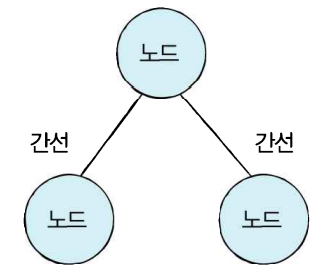

- 인접 행렬(Adjacency Matrix): 2차원 배열로 그래프의 연결 관계를 표현하는 방식
- 인접 리스트(Adjacency List): 리스트로 그래프의 연결 관계를 표현하는 방식

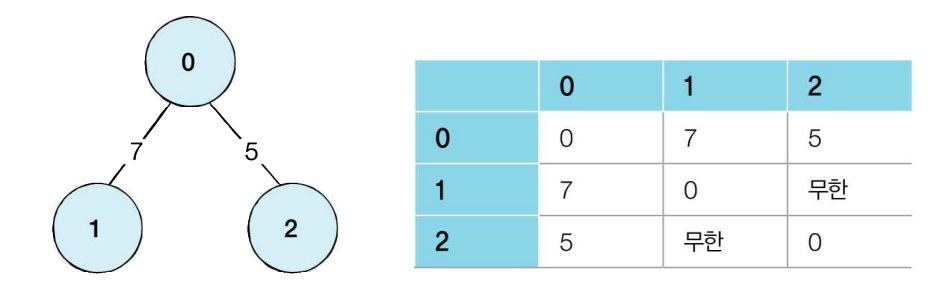

- **인접 행렬(Adjacency Matrix) 방식** : 2차원 배열에 각 노드가 연결된 형태를 기록하는 방식. 연결된 그래프를 인접 행렬로 표현할 때 파이썬에서는 2차원 리스트로 구현 가능
- 연결되어 있지 않은 노드끼리는 무한(Infinity)의 비용이라고 작성한다.
- 그래프를 인접 행렬 방식으로 처리할 때는 데이터 초기화

In [1]:
## 인접 행렬 방식 예제
INF = 999999999 # 무한의 비용 선언

# 2차원 리스트를 이용해 인접 행렬 표현
graph = [[0, 7, 5], [7, 0, INF], [5, INF, 0]]

print(graph)

[[0, 7, 5], [7, 0, 999999999], [5, 999999999, 0]]


- 두 방식의 차이
    - 메모리 측면
        - 인접 행렬 방식 : 노드 개수가 많을수록 메모리가 불필요하게 낭비됨.
        - 인접 리스트 방식: 연결된 정보만을 저장하므로 메모리를 효율적으로 사용함.
    - 속도 : 인접 리스트 방식은 인접 행렬 방식에 비해 특정한 두 노드가 연결되어 있는지에 대한 정보를 얻는 속도가 느리다. (연결된 데이터를 하나씩 확인해야 하기 때문)

- DFS는 탐색을 위해서 사용되는 탐색 알고리즘. (깊이 우선 탐색 알고리즘)
- 특정한 경로로 탐색하다가 특정한 상황에서 최대한 깊숙이 들어가서 노드를 방문한 후, 다시 돌아가 다른 경로로 탐색하는 알고리즘
- DFS는 스택 자료구조를 이용하며 구체적인 동작 과정은 다음과 같다.
    - 1. 탐색 시작 노드를 스택에 삽입하고 방문 처리 한다.
    - 2. 스택의 최상단 노드에 방문하지 않은 인접 노드가 있으면 그 인접 노드를 스택에 넣고 방문 처리를 한다. 방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다.
    - 3. 2번의 과정을 더 이상 수행할 수 없을 때까지 반복한다.
- Tip: '방문 처리'는 스택에 한 번 삽입되어 처리된 노드가 다시 삽입되지 않게 체크하는 것을 의미한다. 방문 처리를 함으로써 각 노드를 한 번씩만 처리할 수 있다.

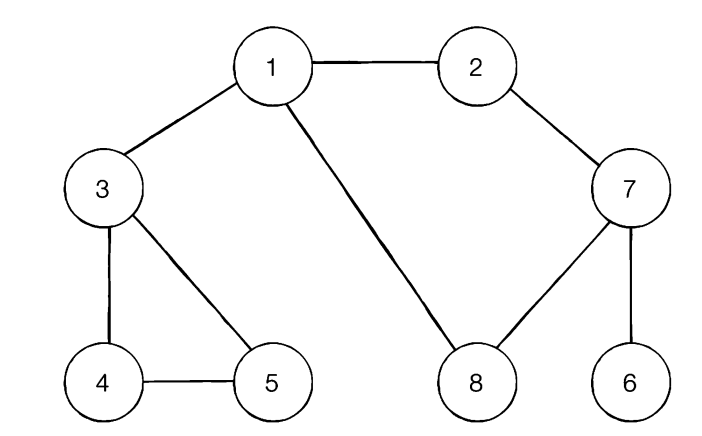

- 노드 1을 시작 노드로 설장하여 DFS를 이용해 탐색을 진행하면 직관적으로 생각할 때 '깊티 우선 탐색'이라는 이름으로부터 알 수 있듯이 단순하게 가장 깊숙이 위치하는 노드에 닿을 때까지 확인(탐색)하면 된다.
- DFS를 이용한 탐색 과정은 다음과 같다. 또한 일반적으로 인접한 노드 중에서 방문하지 않은 노드가 여러 개 있으면 번호가 낮은 순서부터 처리한다.
- Tip: DFS의 기능을 생각하면 순서와 상관없이 처리해도 되지만, 코딩테스트에서는 번호가 낮은 순서부터 처리하도록 명시하는 경우가 종종 있다. => 관행적으로 번호가 낮은 순서부터 처리하도록 구현하는 편

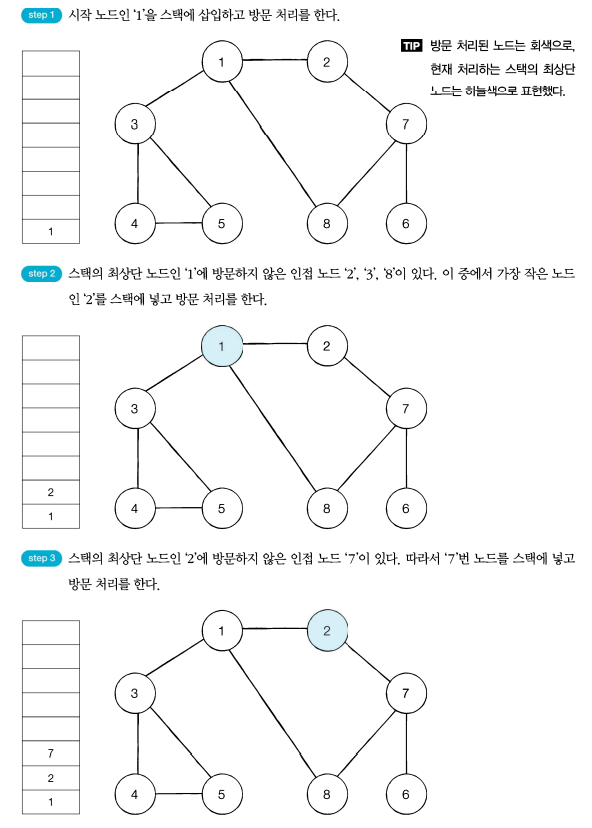

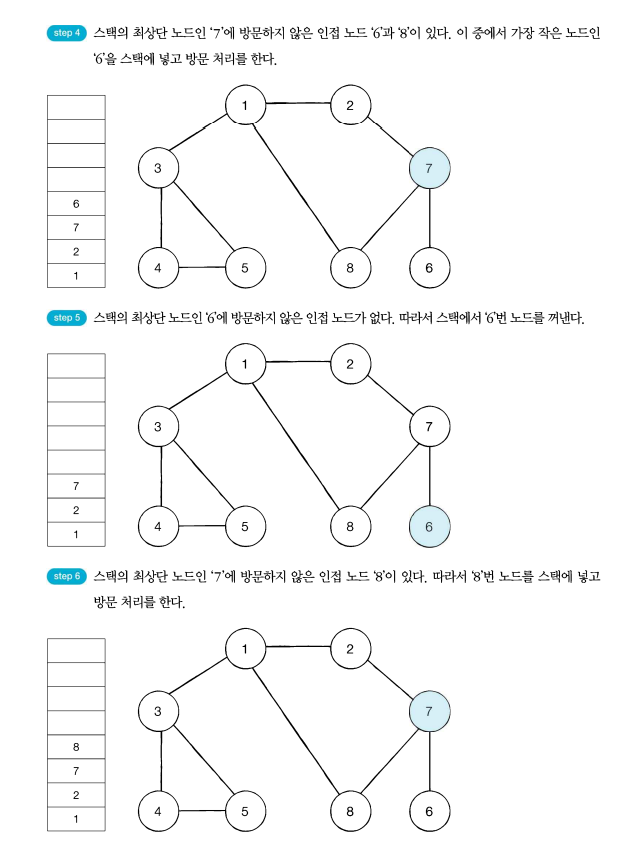

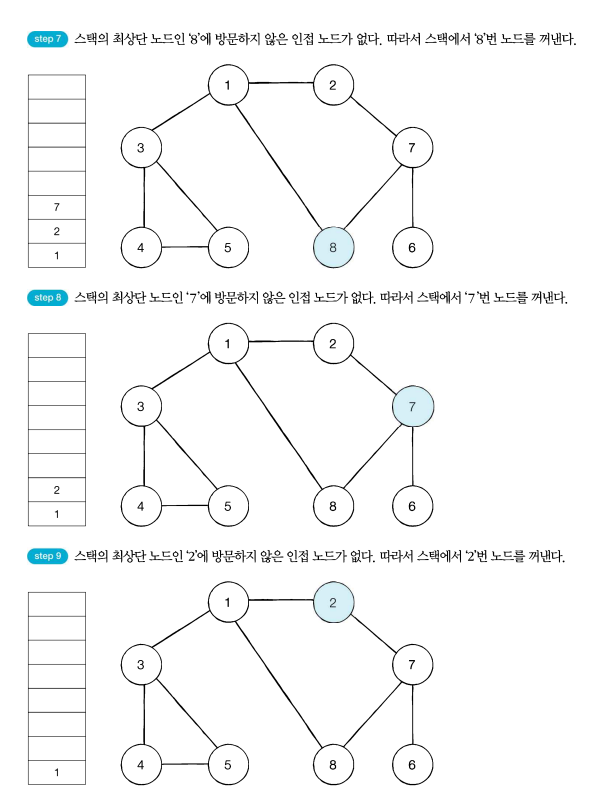

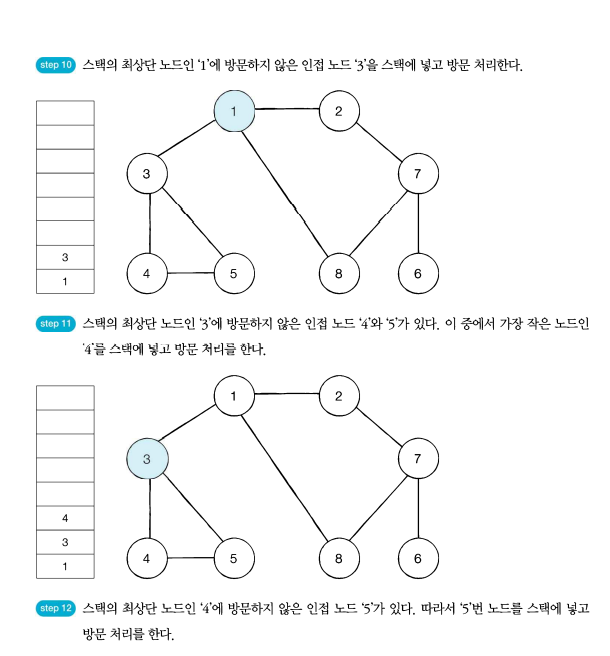

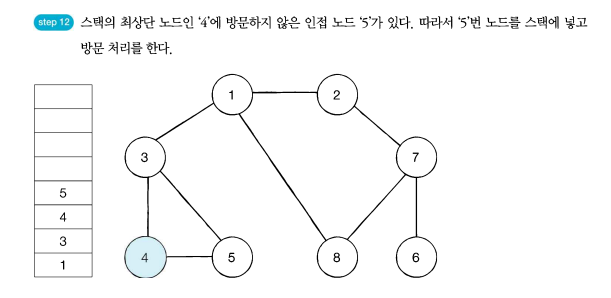

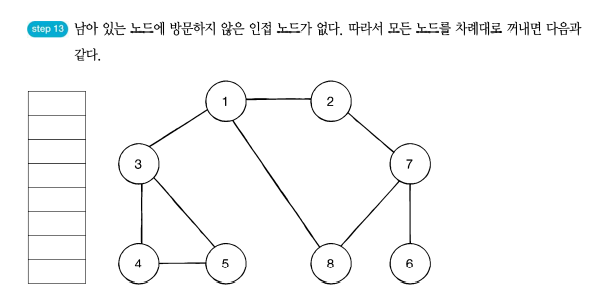

- 결과적으로 노드의 탐색 순서(스택에 들어간 순서)는 다음과 같다.

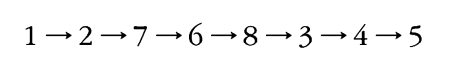

- DFS는 스택 자료구조에 기초한다는 점에서 구현이 간단하다.
- 스택을 쓰지 않아도 되며 탐색을 수행함에 있어서 데이터의 개수가 N개인 경우 O(N)의 시간이 소요된다는 특징이 있다.
- DFS는 스택을 이용하는 알고리즘이기 때문에 실제 구현은 재귀함수를 이용했을 때 매우 간결하게 구현할 수 있다.

In [3]:
## DFS 예제

# DFS 메서드 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v, end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]:
        if not visited[i]:
            dfs(graph, i, visited)

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [
         [],
         [2, 3, 8],
         [1, 7],
         [1, 4, 5],
         [3, 5],
         [3, 4],
         [7],
         [2, 6, 8],
         [1, 7]
]

# 각 노드가 방문된 정보를 리스트 자료형으로 표현(1차원 리스트)
visited = [False] * 9

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 